In [10]:
import numpy as np
import matplotlib.pyplot as plt

* First we load the .npz file that contains all the data.
* Then we split the .npz file into its 7 genres.$$
* Each genre matrix is of the size 512 by 512 by 98

In [11]:
subs_learn_data = np.load("subs_learn_data.npz")
genre_1_mat = subs_learn_data["genre_1_mat"]
genre_2_mat = subs_learn_data["genre_2_mat"]
genre_3_mat = subs_learn_data["genre_3_mat"]
genre_4_mat = subs_learn_data["genre_4_mat"]
genre_5_mat = subs_learn_data["genre_5_mat"]
genre_6_mat = subs_learn_data["genre_6_mat"]
genre_7_mat = subs_learn_data["genre_7_mat"]



* ignore the first song in every matrix,since it is all zeros
* the reason for this is that I made a mistake in svd_data_load_npz.py.
* split the dataset into training and testing (60:37)

In [12]:
genre_1_train = genre_1_mat[:,:,1:61]
genre_1_test = genre_1_mat[:,:,61:]
genre_2_train = genre_2_mat[:,:,1:61]
genre_2_test = genre_2_mat[:,:,61:]
genre_3_train = genre_3_mat[:,:,1:61]
genre_3_test = genre_3_mat[:,:,61:]
genre_4_train = genre_4_mat[:,:,1:61]
genre_4_test = genre_4_mat[:,:,61:]
genre_5_train = genre_5_mat[:,:,1:61]
genre_5_test = genre_5_mat[:,:,61:]
genre_6_train = genre_6_mat[:,:,1:61]
genre_6_test = genre_6_mat[:,:,61:]
genre_7_train = genre_7_mat[:,:,1:61]
genre_7_test = genre_7_mat[:,:,61:]

* reshape all data into matrix


In [13]:
# first reshape all the training data and testing data
genre_1_train = genre_1_train.reshape(512*512,-1)
genre_1_test = genre_1_test.reshape(512*512,-1)
genre_2_train = genre_2_train.reshape(512*512,-1)
genre_2_test = genre_2_test.reshape(512*512,-1)
genre_3_train = genre_3_train.reshape(512*512,-1)
genre_3_test = genre_3_test.reshape(512*512,-1)
genre_4_train = genre_4_train.reshape(512*512,-1)
genre_4_test = genre_4_test.reshape(512*512,-1)
genre_5_train = genre_5_train.reshape(512*512,-1)
genre_5_test = genre_5_test.reshape(512*512,-1)
genre_6_train = genre_6_train.reshape(512*512,-1)
genre_6_test = genre_6_test.reshape(512*512,-1)
genre_7_train = genre_7_train.reshape(512*512,-1)
genre_7_test = genre_7_test.reshape(512*512,-1)





* Run svds on all 7 training sets and plot the singular values

In [14]:
U1,s1,V1 = np.linalg.svd(genre_1_train,full_matrices=False)
singular_values_index = np.arange(60)


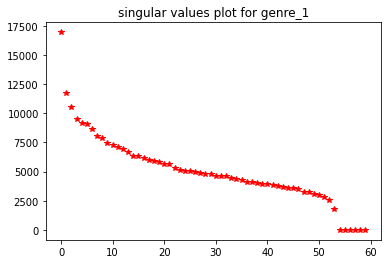

In [15]:
s1_plot = plt.figure()
plt.plot(singular_values_index,s1,'r*')
plt.title("singular values plot for genre_1")
plt.savefig("subs_learn_result/s1_plot.",dpi=300, bbox_inches='tight')

plt.show()
plt.close()

In [16]:
U2,s2,V2 = np.linalg.svd(genre_2_train,full_matrices=False)

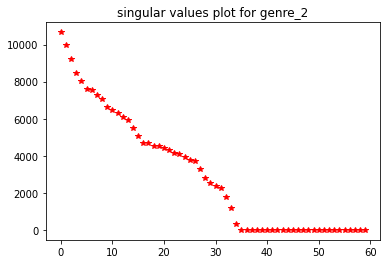

In [17]:
s2_plot = plt.figure()
plt.plot(singular_values_index,s2,'r*')
plt.title("singular values plot for genre_2")
plt.savefig("subs_learn_result/s2_plot.",dpi=300, bbox_inches='tight')

plt.show()
plt.close()

In [18]:
U3,s3,V3 = np.linalg.svd(genre_3_train,full_matrices=False)

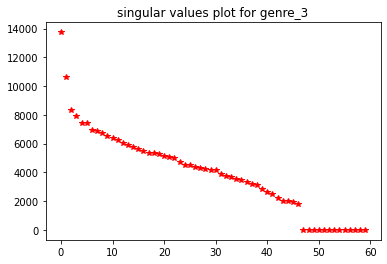

In [20]:
s3_plot = plt.figure()
plt.plot(singular_values_index,s3,'r*')
plt.title("singular values plot for genre_3")
plt.savefig("subs_learn_result/s3_plot.",dpi=300, bbox_inches='tight')

plt.show()
plt.close()

In [21]:
U4,s4,V4 = np.linalg.svd(genre_4_train,full_matrices=False)

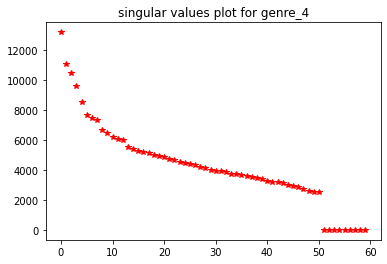

In [22]:
s4_plot = plt.figure()
plt.plot(singular_values_index,s4,'r*')
plt.title("singular values plot for genre_4")
plt.savefig("subs_learn_result/s4_plot.",dpi=300, bbox_inches='tight')

plt.show()
plt.close()

In [23]:
U5,s5,V5 = np.linalg.svd(genre_5_train,full_matrices=False)

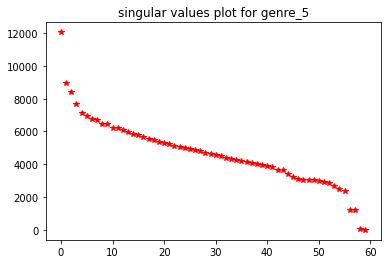

In [24]:
s5_plot = plt.figure()
singular_values_index = np.arange(60)
plt.plot(singular_values_index,s5,'r*')
plt.title("singular values plot for genre_5")
plt.savefig("subs_learn_result/s5_plot",dpi=300, bbox_inches='tight')

plt.show()
plt.close()

In [26]:
U6,s6,V6 = np.linalg.svd(genre_6_train,full_matrices=False)

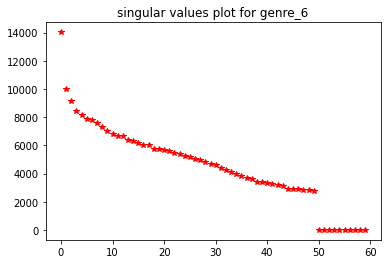

In [28]:
s6_plot = plt.figure()
singular_values_index = np.arange(60)
plt.plot(singular_values_index,s6,'r*')
plt.title("singular values plot for genre_6")
plt.savefig("subs_learn_result/s6_plot",dpi=300, bbox_inches='tight')

plt.show()
plt.close()

In [29]:
U7,s7,V7 = np.linalg.svd(genre_7_train,full_matrices=False)

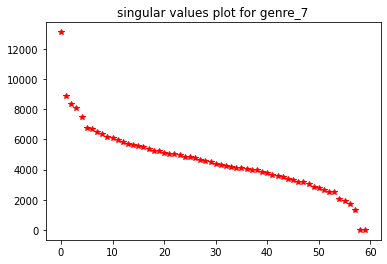

In [30]:
s7_plot = plt.figure()
singular_values_index = np.arange(60)
plt.plot(singular_values_index,s7,'r*')
plt.title("singular values plot for genre_7")
plt.savefig("subs_learn_result/s7_plot",dpi=300, bbox_inches='tight')

plt.show()
plt.close()

* From observating the singular value plot, we can identify the "knee" in each singular value plot

In [33]:
k1 = 54
k2 = 34
k3 = 46
k4 = 50
k5 = 58
k6 = 49
k7 = 58

Uk1 = U1[:,0:k1]
Uk2 = U2[:,0:k2]
Uk3 = U3[:,0:k3]
Uk4 = U4[:,0:k4]
Uk5 = U5[:,0:k5]
Uk6 = U6[:,0:k6]
Uk7 = U7[:,0:k7]

* The prediction function

In [98]:
def predict(x):
    """
        input: x (1D np array of size of 512*512)
        output: prediction (genre_1 to genre_7)
    """
    orth_proj_2_norm = np.empty(7)

    for i,Uk in enumerate([Uk1,Uk2,Uk3,Uk4,Uk5,Uk6,Uk7]):
        orth_proj = x - Uk @ (Uk.T @ x)
        orth_proj_2_norm[i] = np.linalg.norm(orth_proj)
    
    
    prediction = np.argmin(orth_proj_2_norm) + 1

    return prediction

        


    




* calculate the overall training accuary

In [99]:
misclassified = 0
for i in range(37):
    if predict(genre_1_test[:,i]) != 1:
        misclassified += 1
    if predict(genre_2_test[:,i]) != 2:
        misclassified += 1
    if predict(genre_3_test[:,i]) != 3:
        misclassified += 1
    if predict(genre_4_test[:,i]) != 4:
        misclassified += 1
    if predict(genre_5_test[:,i]) != 5:
        misclassified += 1
    if predict(genre_6_test[:,i]) != 6:
        misclassified += 1
    if predict(genre_7_test[:,i]) != 7:
        misclassified += 1

accuracy = (37*5 - misclassified)/(37*5)
print(misclassified)
    


165
